In [1]:
# import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# load dataset
df = pd.read_csv('Impact_of_Remote_Work_on_Mental_Health.csv')
df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [3]:
# Adjust Mental_Health_Condition as last column
MH = df['Mental_Health_Condition']
df = df.drop(columns=['Mental_Health_Condition'])
df['Mental_Health_Condition'] = MH
df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region,Mental_Health_Condition
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe,Depression
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,No,Increase,3,Satisfied,2,Weekly,Good,Asia,Anxiety
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,No,No Change,4,Unsatisfied,5,NaN,Poor,North America,Anxiety
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe,Depression
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America,NaN


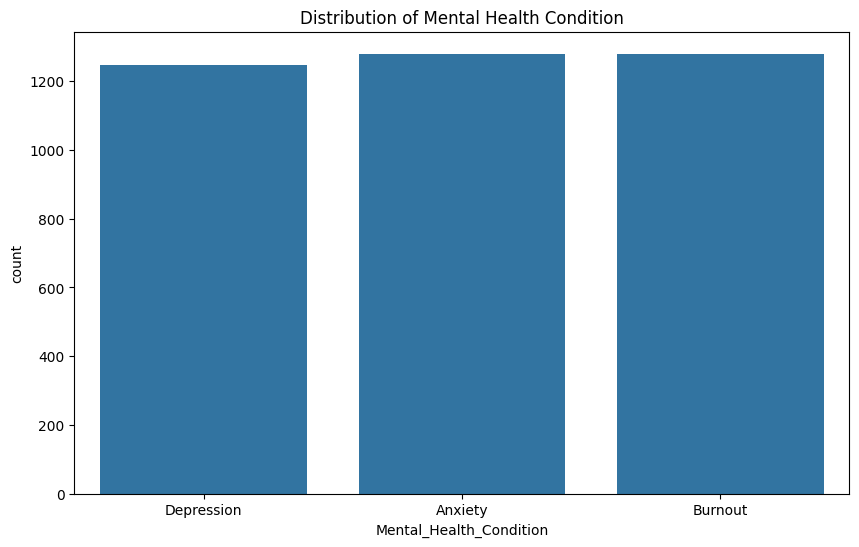

In [4]:
plt.figure(figsize=(10,6))
sns.countplot(x='Mental_Health_Condition', data=df)
plt.title('Distribution of Mental Health Condition')
plt.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Access_to_Mental_Health_Resources  5000 non-null   object
 12  Produc

In [6]:
# check for missing values
df.isnull().sum()

Employee_ID                             0
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    1629
Sleep_Quality                           0
Region                                  0
Mental_Health_Condition              1196
dtype: int64

In [7]:
# check value counts for each categorical column
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f'Value counts for {col}:')
    print(df[col].value_counts())
    print('\n')

Value counts for Employee_ID:
Employee_ID
EMP0001    1
EMP3331    1
EMP3338    1
EMP3337    1
EMP3336    1
          ..
EMP1667    1
EMP1666    1
EMP1665    1
EMP1664    1
EMP5000    1
Name: count, Length: 5000, dtype: int64


Value counts for Gender:
Gender
Female               1274
Male                 1270
Prefer not to say    1242
Non-binary           1214
Name: count, dtype: int64


Value counts for Job_Role:
Job_Role
Project Manager      738
Sales                733
Designer             723
HR                   716
Software Engineer    711
Data Scientist       696
Marketing            683
Name: count, dtype: int64


Value counts for Industry:
Industry
Finance          747
IT               746
Healthcare       728
Retail           726
Education        690
Manufacturing    683
Consulting       680
Name: count, dtype: int64


Value counts for Work_Location:
Work_Location
Remote    1714
Hybrid    1649
Onsite    1637
Name: count, dtype: int64


Value counts for Stress_Level:
Stress_Le

In [8]:
df['Gender'] = df['Gender'].replace('Prefer not to say', 'Other')
df['Physical_Activity'] = df['Physical_Activity'].replace(np.nan, 'Never')
print(df.isnull().sum().sum())
df.head()

1196


,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region,Mental_Health_Condition
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe,Depression
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,No,Increase,3,Satisfied,2,Weekly,Good,Asia,Anxiety
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,No,No Change,4,Unsatisfied,5,Never,Poor,North America,Anxiety
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Yes,Increase,3,Unsatisfied,3,Never,Poor,Europe,Depression
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America,NaN


In [9]:
# impute unknown values - random sample imputation
def distribution_preserving_impute(df, col):
    probs = df[col].value_counts(normalize=True)
    missing_mask = df[col].isnull()

    df.loc[missing_mask, col] = np.random.choice(
        probs.index,
        size=missing_mask.sum(),
        p=probs.values
    )
    return df

df = distribution_preserving_impute(df, 'Mental_Health_Condition')
print(df.isnull().sum().sum())


0


In [10]:
df['Mental_Health_Condition'].value_counts()

Mental_Health_Condition
Anxiety       1705
Burnout       1691
Depression    1604
Name: count, dtype: int64

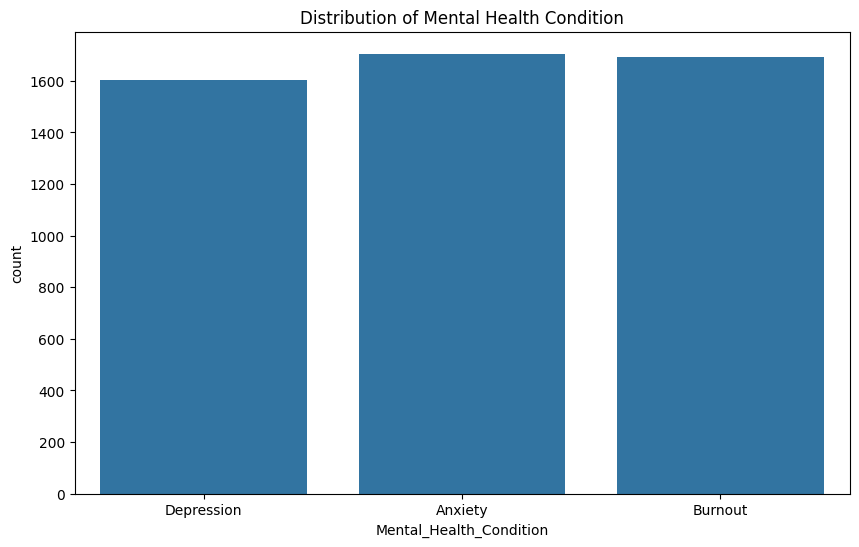

In [11]:
# Data Visualization
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Mental_Health_Condition')
plt.title('Distribution of Mental Health Condition')
plt.show()

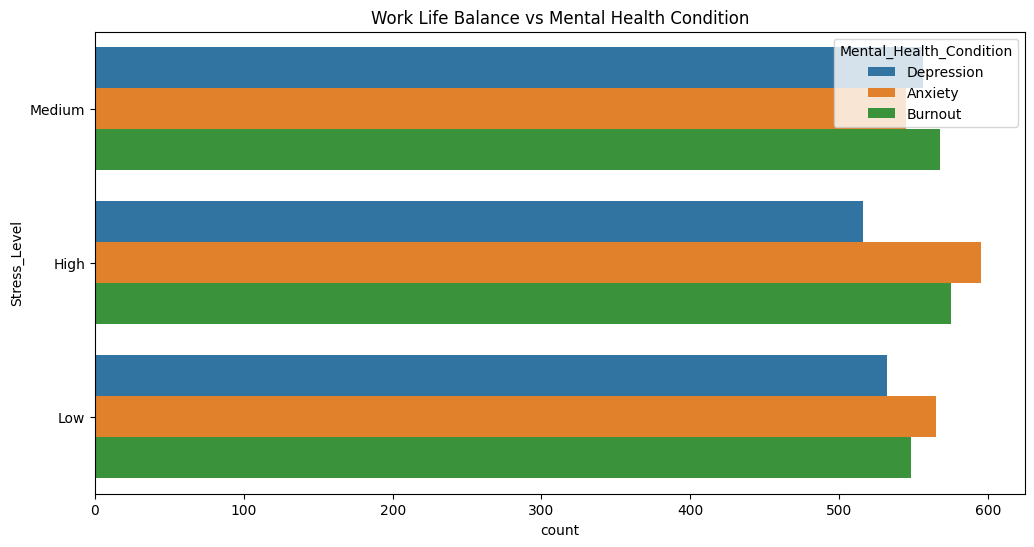

In [12]:
# barh visualization
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='Stress_Level', hue='Mental_Health_Condition')
plt.title('Work Life Balance vs Mental Health Condition')
plt.show()


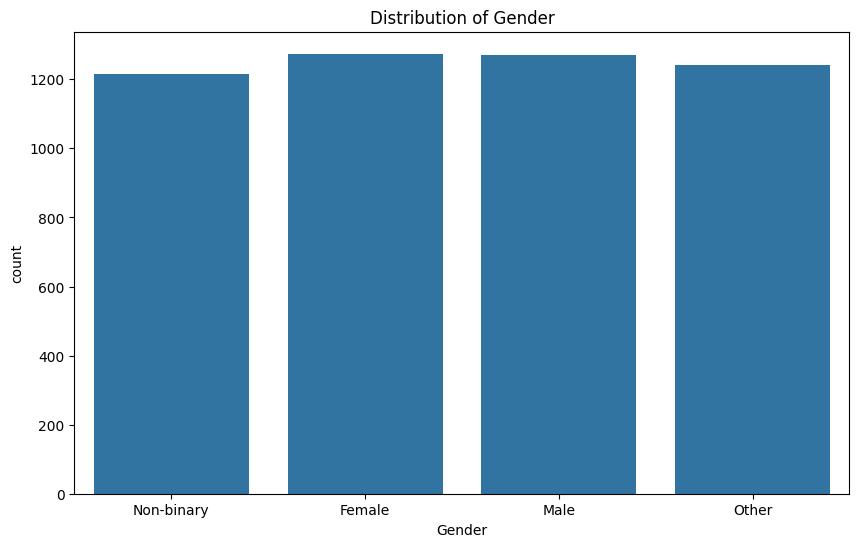

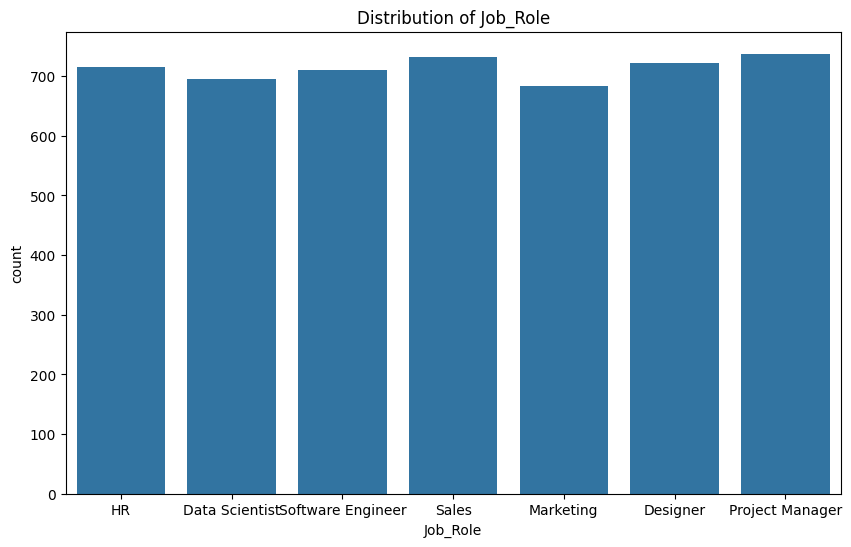

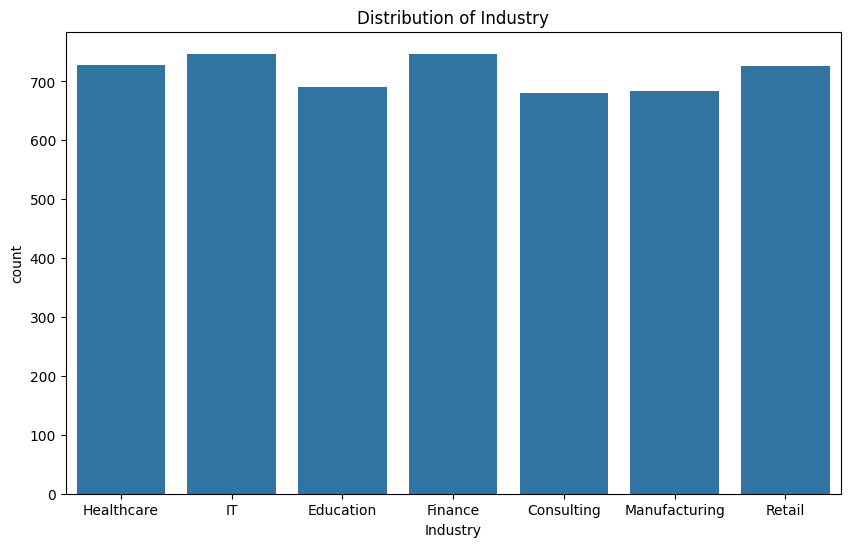

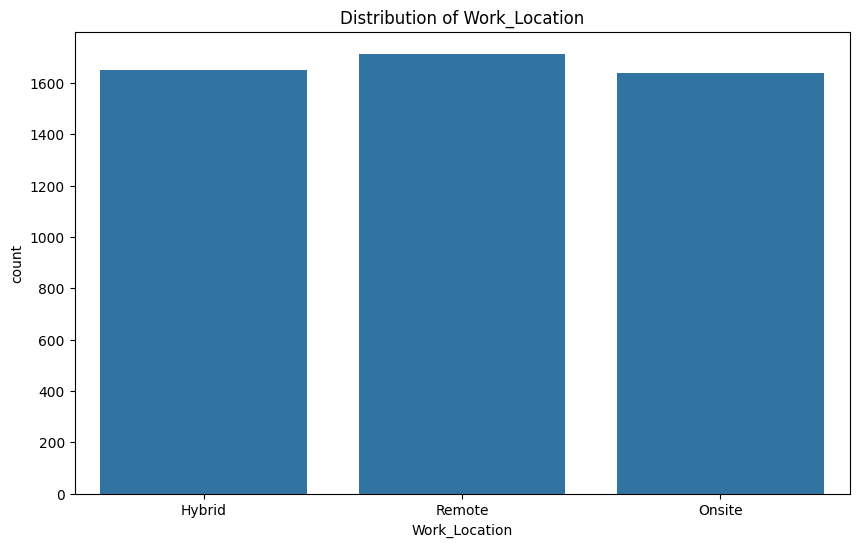

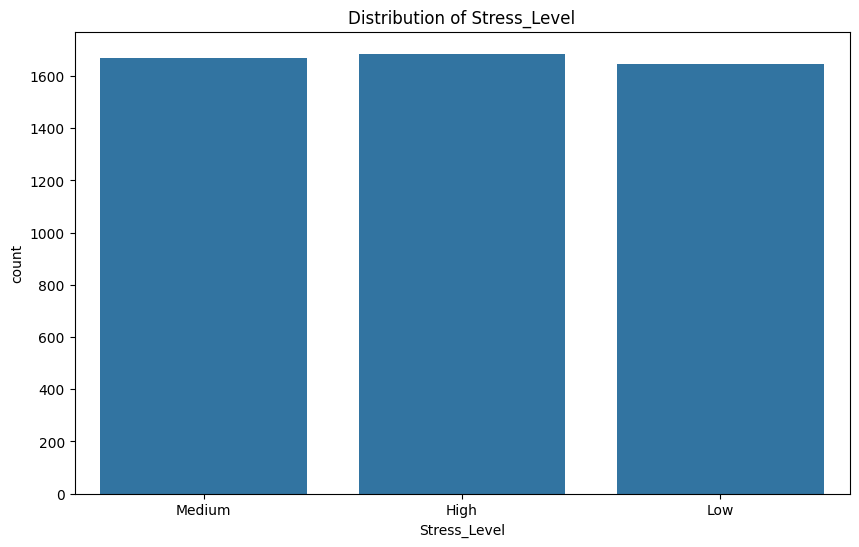

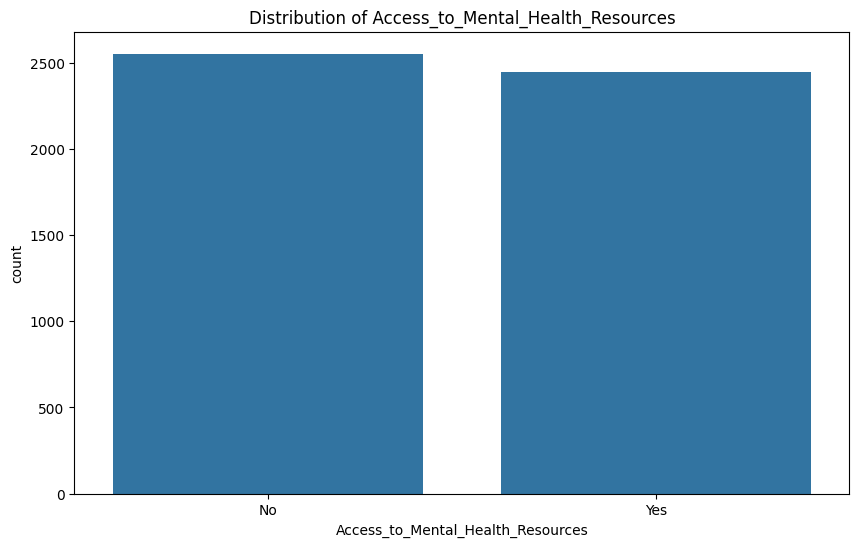

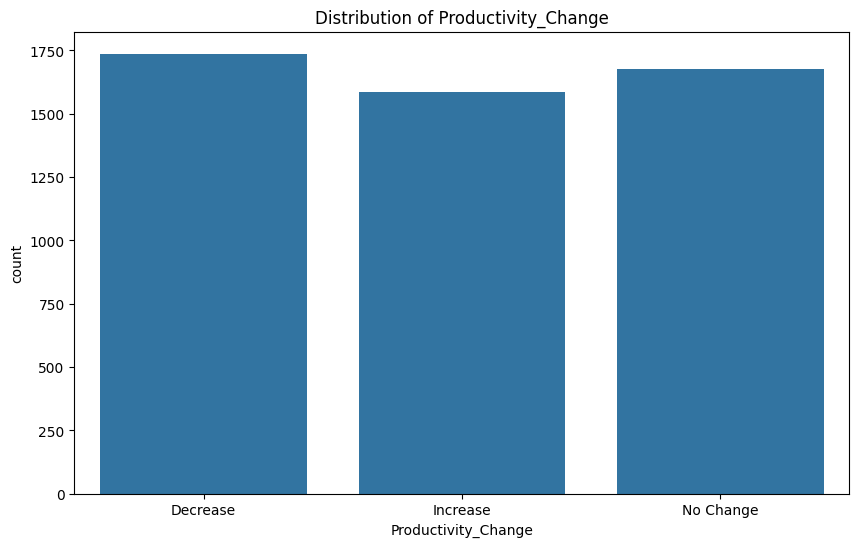

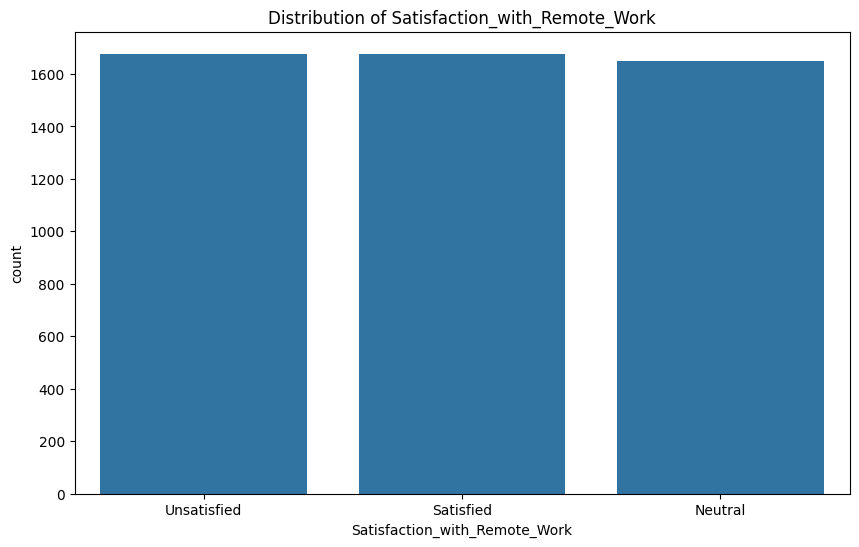

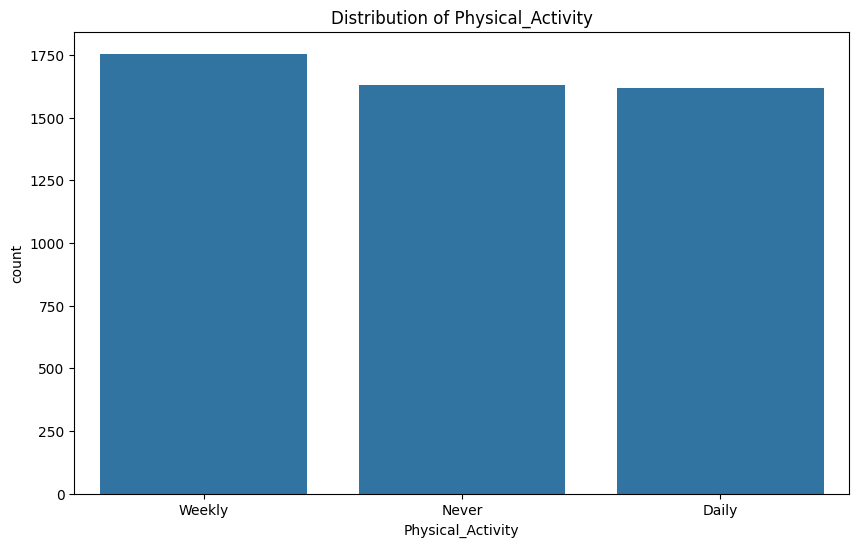

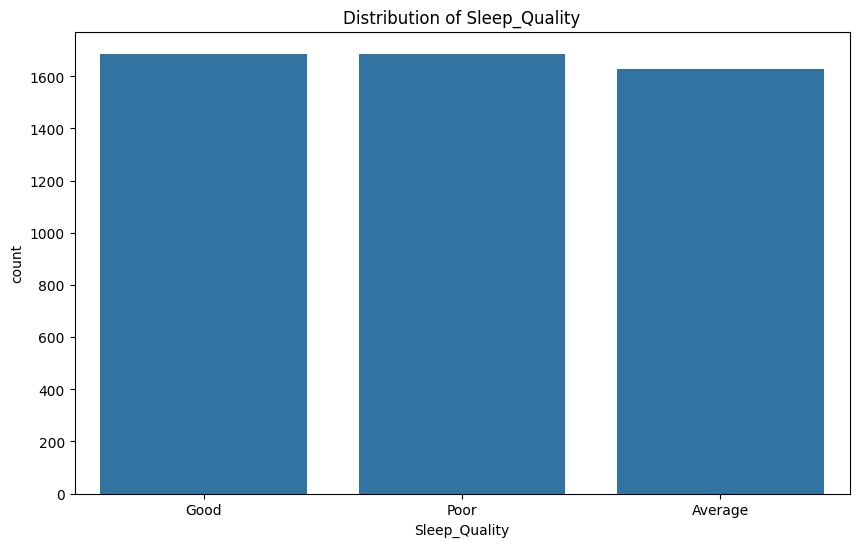

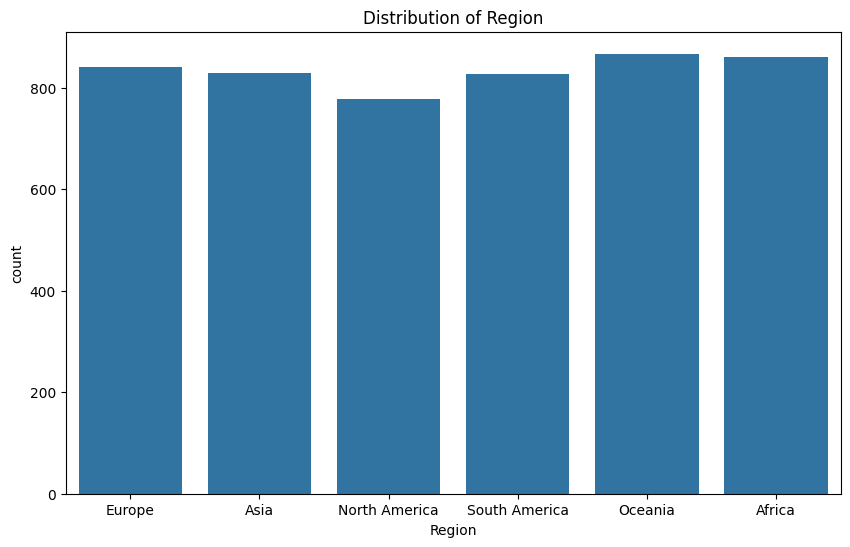

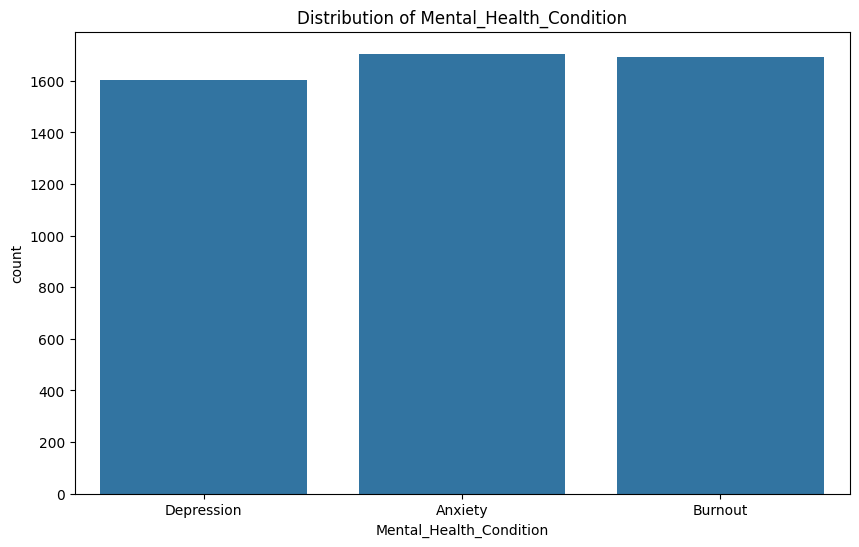

In [19]:
# distribution of attributes
for i in categorical_columns:
    plt.figure(figsize=(10,6))
    sns.countplot(data=df, x=i)
    plt.title(f'Distribution of {i}')
    plt.show()


In [17]:
# Encode categorical variables
df.drop(columns='Employee_ID', inplace=True)
categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df_encoded = df_encoded.astype(float) 
df_encoded.head()


,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work,Gender_Male,Gender_Non-binary,Gender_Other,...,Physical_Activity_Weekly,Sleep_Quality_Good,Sleep_Quality_Poor,Region_Asia,Region_Europe,Region_North America,Region_Oceania,Region_South America,Mental_Health_Condition_Burnout,Mental_Health_Condition_Depression
0,32.0,13.0,47.0,7.0,2.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,40.0,3.0,52.0,4.0,1.0,3.0,2.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,59.0,22.0,46.0,11.0,5.0,4.0,5.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,27.0,20.0,32.0,8.0,4.0,3.0,3.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,49.0,32.0,35.0,12.0,2.0,3.0,3.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


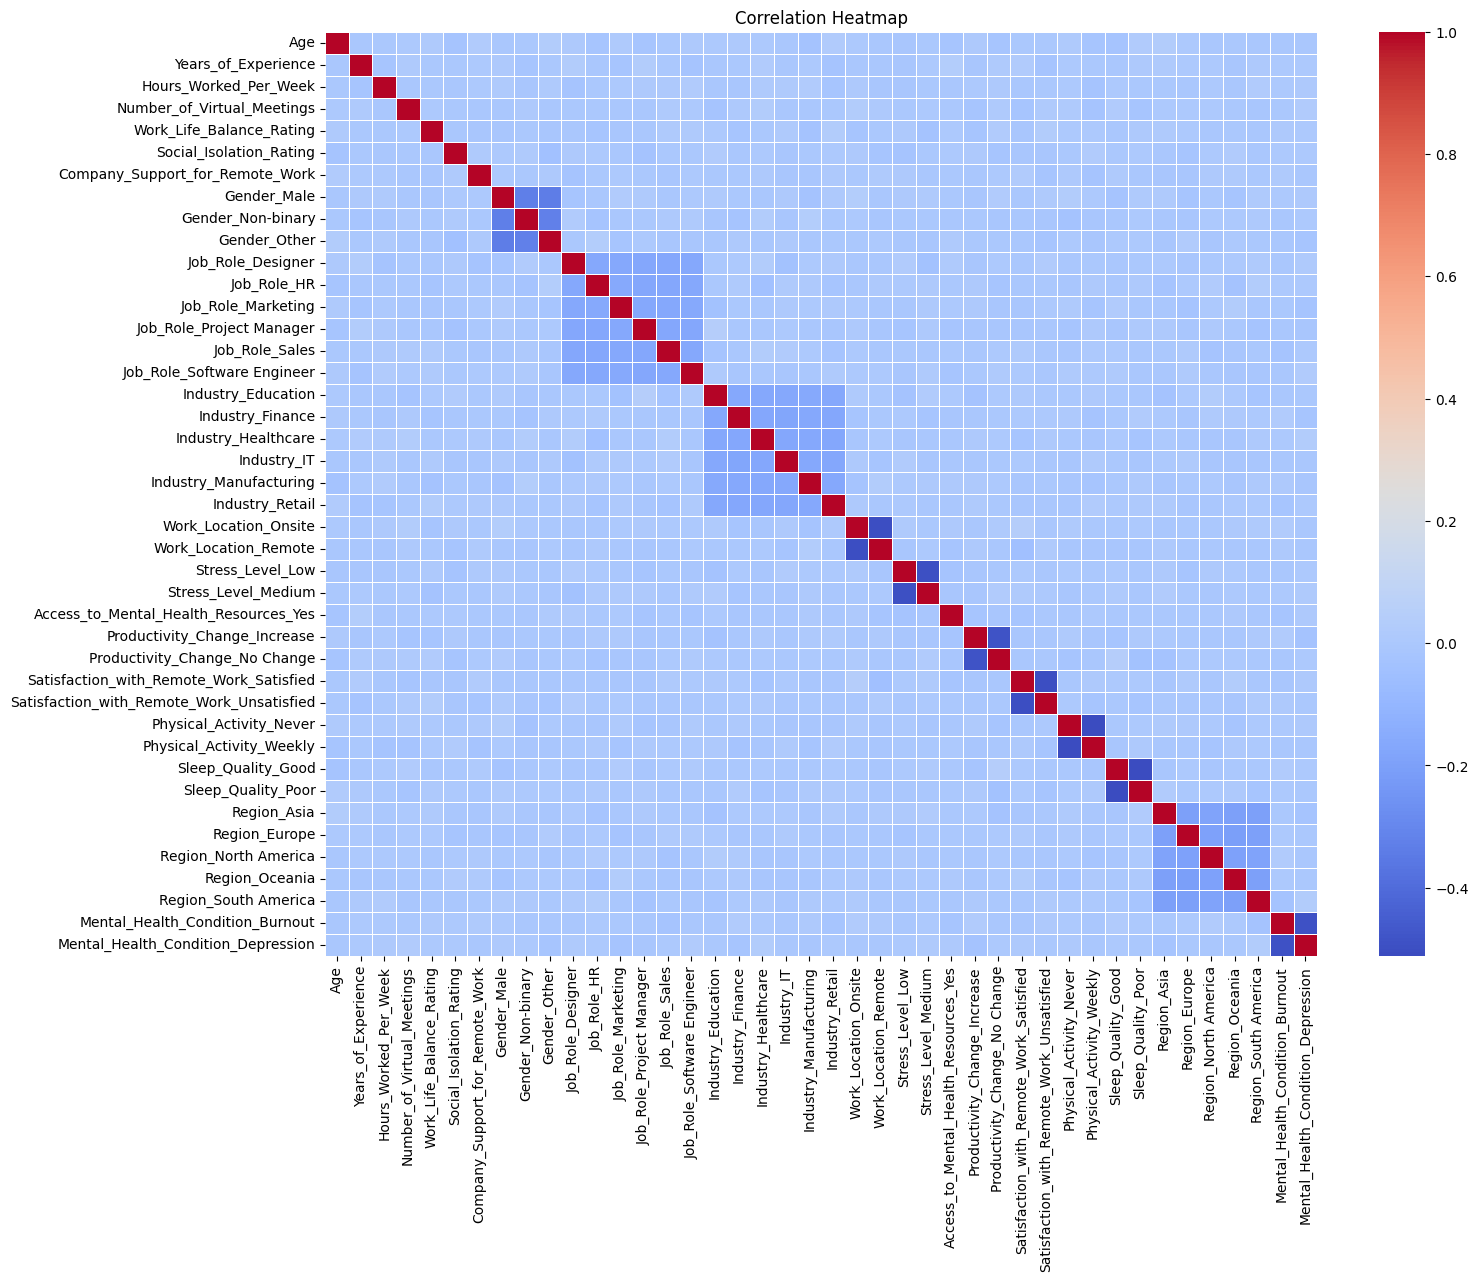

In [18]:
# correlation heatmap
plt.figure(figsize=(16,12))
sns.heatmap(df_encoded.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()